# 1. 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv("/content/real_final.csv")

In [19]:
data.head(1)

,videoId,Mean_H,Mean_S,Mean_V,channelId,duration,viewCount,paidBadge,bday,subs,...,viewCount_log,face_area_ratio,face_detect,Smile_Value,text_rate1,minmax_text_length,text_present,tempo,f0_mean,f0_var
0,-04po9pjezs,0.62,0.455848,0.635897,UCKxsnH8o2fymQDymR0-5MNw,1.0,6227,1,0.615896,0.656151,...,8.736811,0.0,0,0,0.16413,0.076923,1.0,0.644444,0.292685,0.37727


In [71]:
X_features = data.drop(["viewCount_log", 'viewCount', 'videoId', 'channelId'], axis = 1)
y_label = data["viewCount_log"]

In [72]:
X_features.head(2)

,Mean_H,Mean_S,Mean_V,duration,paidBadge,bday,subs,gender,prettyScale,publishedAt,...,tag,face_area_ratio,face_detect,Smile_Value,text_rate1,minmax_text_length,text_present,tempo,f0_mean,f0_var
0,0.62,0.455848,0.635897,1.000000,1,0.615896,0.656151,1,0.288889,0.015444,...,0.0,0.000000,0,0,0.164130,0.076923,1.0,0.644444,0.292685,0.37727
1,0.44,0.427083,0.594872,0.981818,1,0.106968,0.580856,1,0.518519,0.134492,...,0.0,0.153501,1,1,0.051609,0.076923,1.0,0.617021,0.520037,0.55213


In [22]:
X_features.columns

Index(['Mean_H', 'Mean_S', 'Mean_V', 'duration', 'paidBadge', 'bday', 'subs',
       'gender', 'prettyScale', 'publishedAt', 'videoTitle', 'tag',
       'face_area_ratio', 'face_detect', 'Smile_Value', 'text_rate1',
       'minmax_text_length', 'text_present', 'tempo', 'f0_mean', 'f0_var'],
      dtype='object')

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    y_label,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [9]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.5 MB/s eta 0:00:00


# 2. RandomForest + OPTUNA

## rf_ trial 01.
* 1.694572261124932

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [24]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 500),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 200),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 200),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 1.0, 0.5, 0.3, 0.1]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 1000)
    }

    rf = RandomForestRegressor(random_state=1004, **params, n_jobs = -1)

    scores = cross_val_score(rf,
                             X_train,
                             y_train,
                             cv=5,
                             scoring=make_scorer(mean_squared_error))

    mse_mean = scores.mean()
    return mse_mean

In [25]:
rf_study = optuna.create_study(direction='minimize')
rf_study.optimize(objective_rf, n_trials=100, n_jobs = -1)

[I 2024-06-10 23:07:24,747] A new study created in memory with name: no-name-14871cba-c7ea-4072-8313-58967459abd4
[I 2024-06-10 23:07:32,922] Trial 1 finished with value: 2.8032129289115124 and parameters: {'n_estimators': 13, 'max_depth': 81, 'min_samples_split': 155, 'min_samples_leaf': 76, 'max_features': 'log2', 'bootstrap': True, 'max_leaf_nodes': 472}. Best is trial 1 with value: 2.8032129289115124.
[I 2024-06-10 23:07:34,764] Trial 8 finished with value: 2.750963460113994 and parameters: {'n_estimators': 33, 'max_depth': 151, 'min_samples_split': 16, 'min_samples_leaf': 37, 'max_features': 0.1, 'bootstrap': False, 'max_leaf_nodes': 383}. Best is trial 8 with value: 2.750963460113994.
[I 2024-06-10 23:07:35,073] Trial 9 finished with value: 2.882435774931318 and parameters: {'n_estimators': 41, 'max_depth': 121, 'min_samples_split': 129, 'min_samples_leaf': 9, 'max_features': 0.1, 'bootstrap': True, 'max_leaf_nodes': 276}. Best is trial 8 with value: 2.750963460113994.
[I 2024-06

In [27]:
rf_study.best_params

{'n_estimators': 780,
 'max_depth': 336,
 'min_samples_split': 45,
 'min_samples_leaf': 1,
 'max_features': 1.0,
 'bootstrap': True,
 'max_leaf_nodes': 44}

In [28]:
optuna.visualization.plot_param_importances(rf_study)

In [29]:
optuna.visualization.plot_optimization_history(rf_study)

In [30]:
optuna.visualization.plot_parallel_coordinate(rf_study)

In [31]:
opt_rf = RandomForestRegressor(n_jobs = -1,
                                random_state = 2024,
                                **rf_study.best_params)

opt_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=336, max_leaf_nodes=44, min_samples_split=45,
                      n_estimators=780, n_jobs=-1, random_state=2024)

In [33]:
y_pred = opt_rf.predict(X_test)
mse_01 = mean_squared_error(y_test, y_pred)
mse_01

1.694572261124932

## rf_trial 02.
* 1.690682757066258

In [34]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 500),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 100),  # 200 -> 100
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 50),     # 200 -> 50
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 1.0, 0.5, 0.3, 0.1]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 1000)
    }

    rf = RandomForestRegressor(random_state=1004, **params, n_jobs = -1)

    scores = cross_val_score(rf,
                             X_train,
                             y_train,
                             cv=5,
                             scoring=make_scorer(mean_squared_error))

    mse_mean = scores.mean()
    return mse_mean

In [35]:
rf_study_02 = optuna.create_study(direction='minimize')
rf_study_02.optimize(objective_rf, n_trials=100, n_jobs = -1)

[I 2024-06-10 23:24:31,845] A new study created in memory with name: no-name-5bdb48c2-0f87-414a-8441-05b8133f0de4
[I 2024-06-10 23:24:57,992] Trial 0 finished with value: 2.3334825188676396 and parameters: {'n_estimators': 192, 'max_depth': 487, 'min_samples_split': 30, 'min_samples_leaf': 30, 'max_features': 'sqrt', 'bootstrap': True, 'max_leaf_nodes': 74}. Best is trial 0 with value: 2.3334825188676396.
[I 2024-06-10 23:25:00,390] Trial 11 finished with value: 2.8752841885298137 and parameters: {'n_estimators': 204, 'max_depth': 320, 'min_samples_split': 49, 'min_samples_leaf': 29, 'max_features': 0.1, 'bootstrap': True, 'max_leaf_nodes': 281}. Best is trial 0 with value: 2.3334825188676396.
[I 2024-06-10 23:25:02,864] Trial 8 finished with value: 1.6742669666229086 and parameters: {'n_estimators': 234, 'max_depth': 473, 'min_samples_split': 8, 'min_samples_leaf': 13, 'max_features': 1.0, 'bootstrap': True, 'max_leaf_nodes': 539}. Best is trial 8 with value: 1.6742669666229086.
[I 20

In [36]:
opt_rf_02 = RandomForestRegressor(n_jobs = -1,
                                  random_state = 1004,
                                  **rf_study_02.best_params)

opt_rf_02.fit(X_train, y_train)

RandomForestRegressor(max_depth=336, max_leaf_nodes=44, min_samples_split=45,
                      n_estimators=780, n_jobs=-1, random_state=1004)

In [37]:
y_pred_02 = opt_rf_02.predict(X_test)
mse_02 = mean_squared_error(y_test, y_pred_02)
mse_02

1.690682757066258

In [39]:
# 시각화

optuna.visualization.plot_param_importances(rf_study_02)
#optuna.visualization.plot_optimization_history(rf_study)
#optuna.visualization.plot_optimization_history(rf_study)

In [40]:
#optuna.visualization.plot_param_importances(rf_study_02)
optuna.visualization.plot_optimization_history(rf_study_02)
#optuna.visualization.plot_optimization_history(rf_study)

In [42]:
#optuna.visualization.plot_param_importances(rf_study_02)
#optuna.visualization.plot_optimization_history(rf_study_02)
optuna.visualization.plot_parallel_coordinate(rf_study_02)

In [43]:
rf_study_02.best_params

{'n_estimators': 286,
 'max_depth': 84,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_features': 1.0,
 'bootstrap': True,
 'max_leaf_nodes': 428}

## rf_trial 03.
* 1.4777942470003982

In [44]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 800),            # 1000 -> 800
        "max_depth": trial.suggest_int("max_depth", 1, 100),                  # 500 -> 100
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 50),   # 200 -> 100 -> 50
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),     # 200 -> 50 -> 20
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 1.0, 0.5, 0.3, 0.1]),
        "bootstrap": True, # True로 고정
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 1000)
    }

    rf = RandomForestRegressor(random_state=1004, **params, n_jobs = -1)

    scores = cross_val_score(rf,
                             X_train,
                             y_train,
                             cv=5,
                             scoring=make_scorer(mean_squared_error))

    mse_mean = scores.mean()
    return mse_mean

In [45]:
rf_study_03 = optuna.create_study(direction='minimize')
rf_study_03.optimize(objective_rf, n_trials=100, n_jobs = -1)

[I 2024-06-10 23:41:49,376] A new study created in memory with name: no-name-4ddff318-6c88-420e-8f0f-cd499af7a06a
[I 2024-06-10 23:42:06,388] Trial 10 finished with value: 1.7555807873110236 and parameters: {'n_estimators': 64, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 0.5, 'max_leaf_nodes': 704}. Best is trial 10 with value: 1.7555807873110236.
[I 2024-06-10 23:42:15,473] Trial 7 finished with value: 1.6759667130857914 and parameters: {'n_estimators': 190, 'max_depth': 56, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 1.0, 'max_leaf_nodes': 205}. Best is trial 7 with value: 1.6759667130857914.
[I 2024-06-10 23:42:16,290] Trial 9 finished with value: 2.000542323536931 and parameters: {'n_estimators': 206, 'max_depth': 9, 'min_samples_split': 24, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 369}. Best is trial 7 with value: 1.6759667130857914.
[I 2024-06-10 23:42:16,473] Trial 4 finished with value: 2.382109594

In [74]:
opt_rf_03 = RandomForestRegressor(n_jobs = -1,
                                  random_state = 1004,
                                  **rf_study_03.best_params)

opt_rf_03.fit(X_train, y_train)

RandomForestRegressor(max_depth=94, max_leaf_nodes=290, min_samples_leaf=2,
                      min_samples_split=6, n_estimators=453, n_jobs=-1,
                      random_state=1004)

In [75]:
y_pred_03 = opt_rf_03.predict(X_test)
mse_03 = mean_squared_error(y_test, y_pred_03)
mse_03

1.4777942470003982

In [51]:
optuna.visualization.plot_parallel_coordinate(rf_study_03)

In [52]:
rf_study_03.best_params

{'n_estimators': 453,
 'max_depth': 94,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 1.0,
 'max_leaf_nodes': 290}

In [54]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 14.8 MB/s eta 0:00:00


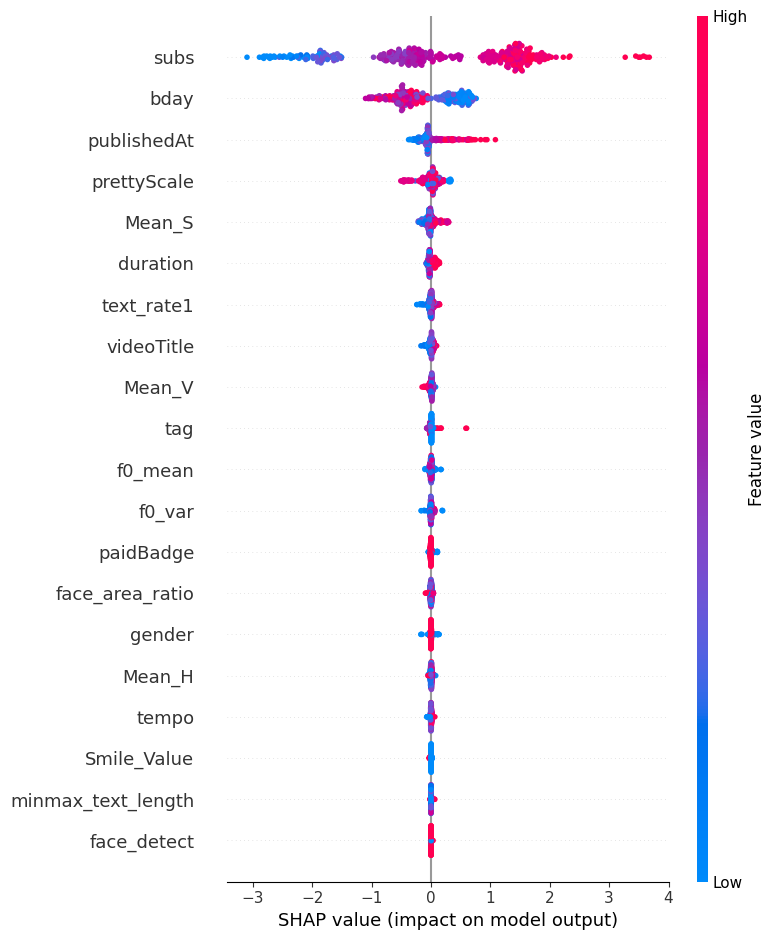

In [55]:
import shap

# 학습된 모델로부터 SHAP 값 계산
explainer = shap.TreeExplainer(opt_rf_03)
shap_values = explainer.shap_values(X_test)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X_test)

## rf_trial 04.

* shap 분석 -> 하위 컬럼 3개 드랍(`Smile_Value`, `minmax_text_length`, `face_tetect`)
* 1.469741469526703

In [76]:
X_features.columns

Index(['Mean_H', 'Mean_S', 'Mean_V', 'duration', 'paidBadge', 'bday', 'subs',
       'gender', 'prettyScale', 'publishedAt', 'videoTitle', 'tag',
       'face_area_ratio', 'face_detect', 'Smile_Value', 'text_rate1',
       'minmax_text_length', 'text_present', 'tempo', 'f0_mean', 'f0_var'],
      dtype='object')

In [77]:
X_features_dropped = X_features.drop(["Smile_Value", "minmax_text_length", "face_detect"], axis = 1)

In [78]:
X_features_dropped.columns

Index(['Mean_H', 'Mean_S', 'Mean_V', 'duration', 'paidBadge', 'bday', 'subs',
       'gender', 'prettyScale', 'publishedAt', 'videoTitle', 'tag',
       'face_area_ratio', 'text_rate1', 'text_present', 'tempo', 'f0_mean',
       'f0_var'],
      dtype='object')

In [79]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_features_dropped,
                                                            y_label,
                                                            test_size = 0.2,
                                                            random_state = 42)

In [81]:
# 파라미터는 03번째 모델 그대로

opt_rf_04 = RandomForestRegressor(n_jobs = -1,
                                  random_state = 42,
                                  **rf_study_03.best_params)

opt_rf_04.fit(X_train_d, y_train_d)

RandomForestRegressor(max_depth=94, max_leaf_nodes=290, min_samples_leaf=2,
                      min_samples_split=6, n_estimators=453, n_jobs=-1,
                      random_state=42)

In [82]:
y_pred_04 = opt_rf_04.predict(X_test_d)
mse_04 = mean_squared_error(y_test_d, y_pred_04)
mse_04

1.469741469526703

## rf_trial 05.
* 1.468264107801379


In [83]:
rf_study_03.best_params

{'n_estimators': 453,
 'max_depth': 94,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 1.0,
 'max_leaf_nodes': 290}

In [84]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 600),            # 1000 -> 800 -> 600
        "max_depth": trial.suggest_int("max_depth", 1, 100),                  # 500 -> 100
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),   # 200 -> 100 -> 50 -> 20
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),     # 200 -> 50 -> 20 -> 10
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 1.0, 0.5]), # 0.3, 0.1 삭제
        "bootstrap": True, # True로 고정
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 500)         # 1000 -> 500
    }

    rf = RandomForestRegressor(random_state=42, **params, n_jobs = -1)

    scores = cross_val_score(rf,
                             X_train_d,
                             y_train_d,
                             cv=5,
                             scoring=make_scorer(mean_squared_error))

    mse_mean = scores.mean()
    return mse_mean

In [85]:
rf_study_05 = optuna.create_study(direction='minimize')
rf_study_05.optimize(objective_rf, n_trials=100, n_jobs = -1)

[I 2024-06-11 00:09:43,265] A new study created in memory with name: no-name-1a249562-ddb8-406f-8b68-d4c205926348
[I 2024-06-11 00:09:55,267] Trial 11 finished with value: 1.5967914829366436 and parameters: {'n_estimators': 39, 'max_depth': 47, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 1.0, 'max_leaf_nodes': 436}. Best is trial 11 with value: 1.5967914829366436.
[I 2024-06-11 00:09:56,924] Trial 8 finished with value: 1.8446517937353026 and parameters: {'n_estimators': 69, 'max_depth': 89, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_leaf_nodes': 401}. Best is trial 11 with value: 1.5967914829366436.
[I 2024-06-11 00:09:57,074] Trial 3 finished with value: 2.012009944166828 and parameters: {'n_estimators': 74, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_leaf_nodes': 360}. Best is trial 11 with value: 1.5967914829366436.
[I 2024-06-11 00:10:11,017] Trial 0 finished with value: 1.7072648

In [86]:
# 파라미터는 03번째 모델 그대로

opt_rf_05 = RandomForestRegressor(n_jobs = -1,
                                  random_state = 42,
                                  **rf_study_05.best_params)

opt_rf_05.fit(X_train_d, y_train_d)

RandomForestRegressor(max_depth=45, max_leaf_nodes=347, min_samples_leaf=2,
                      min_samples_split=3, n_estimators=370, n_jobs=-1,
                      random_state=42)

In [87]:
y_pred_05 = opt_rf_05.predict(X_test_d)
mse_05 = mean_squared_error(y_test_d, y_pred_05)
mse_05

1.468264107801379

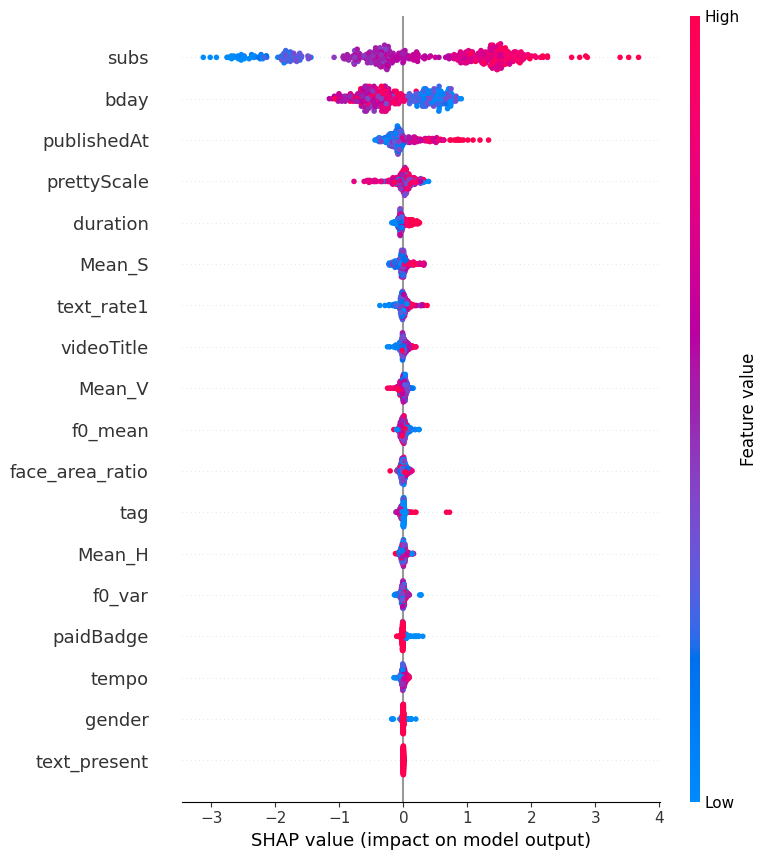

In [88]:
import shap

# 학습된 모델로부터 SHAP 값 계산
explainer = shap.TreeExplainer(opt_rf_05)
shap_values = explainer.shap_values(X_test_d)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X_test_d)

## rf_trial 06.
* gender, text_present 드랍
* 1.4818933543660657

In [89]:
X_features_dropped.columns

Index(['Mean_H', 'Mean_S', 'Mean_V', 'duration', 'paidBadge', 'bday', 'subs',
       'gender', 'prettyScale', 'publishedAt', 'videoTitle', 'tag',
       'face_area_ratio', 'text_rate1', 'text_present', 'tempo', 'f0_mean',
       'f0_var'],
      dtype='object')

In [90]:
X_features_dropped = X_features_dropped.drop(["gender", "text_present"], axis = 1)

In [91]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_features_dropped,
                                                            y_label,
                                                            test_size = 0.2,
                                                            random_state = 42)

In [113]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 600),            # 1000 -> 800 -> 600
        "max_depth": trial.suggest_int("max_depth", 1, 100),                  # 500 -> 100
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),   # 200 -> 100 -> 50 -> 20
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),     # 200 -> 50 -> 20 -> 10
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 1.0, 0.5]), # 0.3, 0.1 삭제
        "bootstrap": True, # True로 고정
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 500)         # 1000 -> 500
    }

    rf = RandomForestRegressor(random_state=42, **params, n_jobs = -1)

    scores = cross_val_score(rf,
                             X_train_d,
                             y_train_d,
                             cv=5,
                             scoring=make_scorer(mean_squared_error))

    mse_mean = scores.mean()
    return mse_mean

In [114]:
rf_study_06 = optuna.create_study(direction='minimize')
rf_study_06.optimize(objective_rf, n_trials=100, n_jobs = -1)

[I 2024-06-11 00:58:52,567] A new study created in memory with name: no-name-108be31c-ac8a-46cf-8a02-74c05e67bbaf
[I 2024-06-11 00:59:00,368] Trial 2 finished with value: 1.6979020498186983 and parameters: {'n_estimators': 8, 'max_depth': 83, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 1.0, 'max_leaf_nodes': 104}. Best is trial 2 with value: 1.6979020498186983.
[I 2024-06-11 00:59:18,994] Trial 4 finished with value: 2.258517534611626 and parameters: {'n_estimators': 186, 'max_depth': 3, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 0.5, 'max_leaf_nodes': 310}. Best is trial 2 with value: 1.6979020498186983.
[I 2024-06-11 00:59:25,531] Trial 8 finished with value: 1.7775581435031842 and parameters: {'n_estimators': 240, 'max_depth': 53, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 376}. Best is trial 2 with value: 1.6979020498186983.
[I 2024-06-11 00:59:26,470] Trial 5 finished with value: 1.7480961794451

In [115]:
opt_rf_06 = RandomForestRegressor(n_jobs = -1,
                                  random_state = 42,
                                  **rf_study_06.best_params)

opt_rf_06.fit(X_train_d, y_train_d)
y_pred_06 = opt_rf_06.predict(X_test_d)
mse_06 = mean_squared_error(y_test_d, y_pred_06)
mse_06

1.4818933543660657

In [116]:
rf_study_06.best_params

{'n_estimators': 395,
 'max_depth': 13,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 1.0,
 'max_leaf_nodes': 164}

## rf_trial 07.
* 1.468339477648804 (저장)

In [97]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 1, 400),            # 1000 -> 800 -> 600 -> 400
        "max_depth": trial.suggest_int("max_depth", 1, 50),                   # 500 -> 100 -> 50
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),   # 200 -> 100 -> 50 -> 20 -> 10
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),     # 200 -> 50 -> 20 -> 10
        "max_features": 1.0, # 0.3, 0.1 삭제 -> 1.0 고정
        "bootstrap": True,   # True 고정
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 500)         # 1000 -> 500
    }

    rf = RandomForestRegressor(random_state=42, **params, n_jobs = -1)

    scores = cross_val_score(rf,
                             X_train_d,
                             y_train_d,
                             cv=5,
                             scoring=make_scorer(mean_squared_error))

    mse_mean = scores.mean()
    return mse_mean

In [100]:
rf_study_07 = optuna.create_study(direction='minimize')
rf_study_07.optimize(objective_rf, n_trials=100, n_jobs = -1)

[I 2024-06-11 00:28:29,618] A new study created in memory with name: no-name-4ff6d483-4b2e-4b3e-9f08-6e4fc019769d
[I 2024-06-11 00:28:38,836] Trial 7 finished with value: 1.670874659395718 and parameters: {'n_estimators': 17, 'max_depth': 47, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_leaf_nodes': 61}. Best is trial 7 with value: 1.670874659395718.
[I 2024-06-11 00:28:39,008] Trial 3 finished with value: 1.5900410942999623 and parameters: {'n_estimators': 27, 'max_depth': 33, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_leaf_nodes': 276}. Best is trial 3 with value: 1.5900410942999623.
[I 2024-06-11 00:28:43,570] Trial 4 finished with value: 1.6459797223167016 and parameters: {'n_estimators': 81, 'max_depth': 33, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_leaf_nodes': 197}. Best is trial 3 with value: 1.5900410942999623.
[I 2024-06-11 00:28:47,674] Trial 2 finished with value: 1.630130731229863 and parameters: {'n_estimators': 118, 'max_depth': 15, 'min_sample

In [101]:
opt_rf_07 = RandomForestRegressor(n_jobs = -1,
                                  random_state = 42,
                                  **rf_study_07.best_params)

opt_rf_07.fit(X_train_d, y_train_d)
y_pred_07 = opt_rf_07.predict(X_test_d)
mse_07 = mean_squared_error(y_test_d, y_pred_07)
mse_07

1.468339477648804

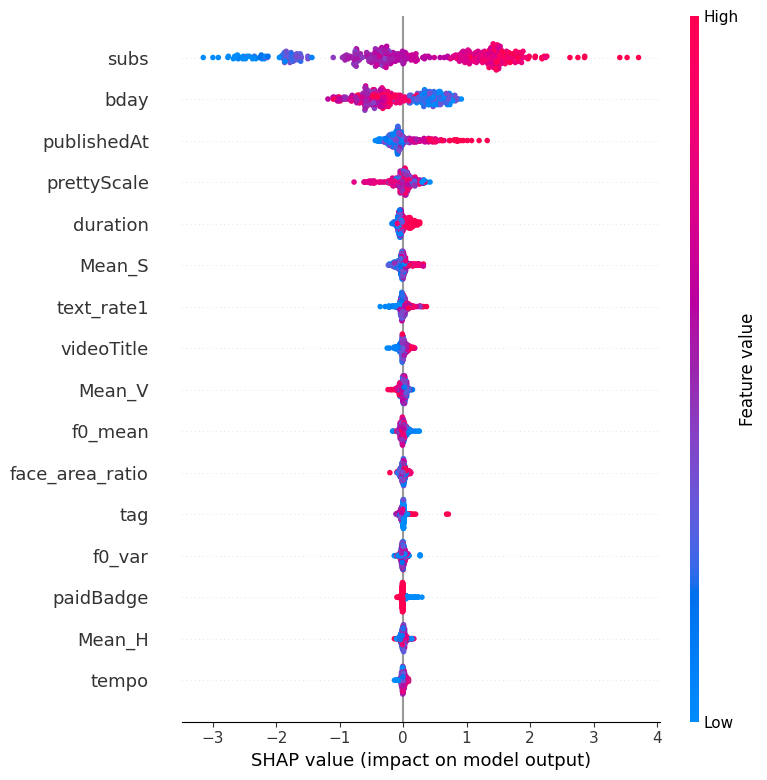

In [103]:
explainer = shap.TreeExplainer(opt_rf_07)
shap_values = explainer.shap_values(X_test_d)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X_test_d)

In [112]:
import joblib

joblib.dump(opt_rf_07, "opt_rf_07.pkl")

['opt_rf_07.pkl']

# 3. RandomForest + GridSearchCV
* 1.4699870875032444


In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

def gs(model=None, parameters=None):
    # grid search
    gs = GridSearchCV(
        model,
        param_grid=parameters,
        cv=5,
        n_jobs=-1,
        verbose=2,
        scoring=make_scorer(mean_squared_error, greater_is_better=False)  # minimize MSE
    )

    gs.fit(X_train_d, y_train_d)
    print("best_score_ : ", gs.best_score_)
    print("-------------- best_params --------------")
    print(gs.best_params_)
    print("-----------------------------------------")

    gs_best = gs.best_estimator_
    gs_ypred = gs_best.predict(X_test_d)
    gs_mse = mean_squared_error(y_test_d, gs_ypred)

    print("Best MSE : ", gs_mse)
    return gs_best, gs_mse

In [102]:
rf_study_07.best_params

{'n_estimators': 378,
 'max_depth': 37,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 247}

In [105]:
### 옵튜나 파라미터 참고해서 GridSearchCV 돌려보기

parameters ={
    "n_estimators" : [350, 370, 400, 450],
    "max_depth":[10, 20, 30, 37],
    "min_samples_split":[3, 4, 5],
    "min_samples_leaf":[2, 3],
    "max_features":[1.0],
    "bootstrap":[True],
    "max_leaf_nodes":[200, 250, 300]
}

rfr = RandomForestRegressor(n_jobs = -1, random_state = 12)
rfr_best, rfr_mse = gs(model = rfr,
                       parameters = parameters)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best_score_ :  -1.5417933047373666
-------------- best_params --------------
{'bootstrap': True, 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': 300, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 450}
-----------------------------------------
Best MSE :  1.4699870875032444


In [106]:
rfr_mse

1.4699870875032444